# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 19.18 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
#Normalizando
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

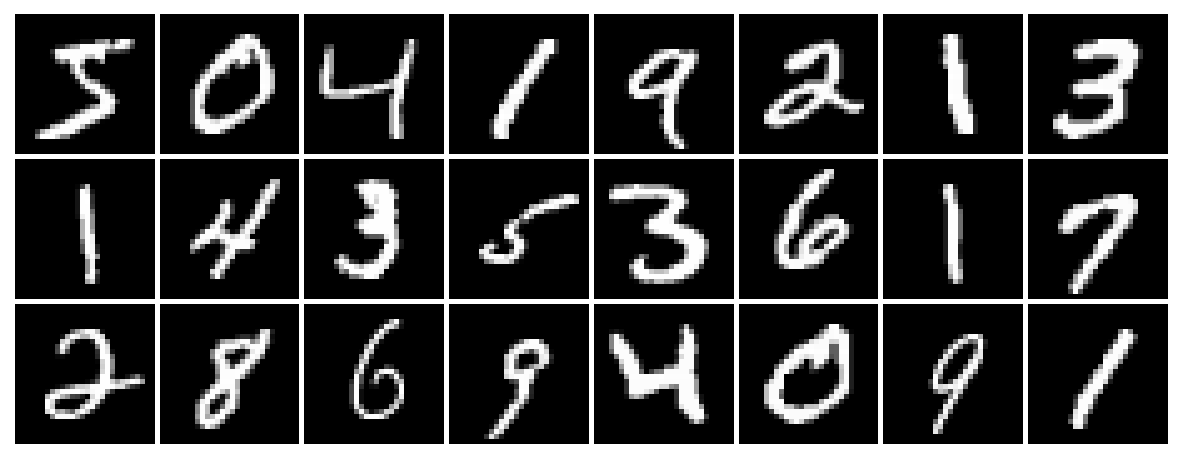

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


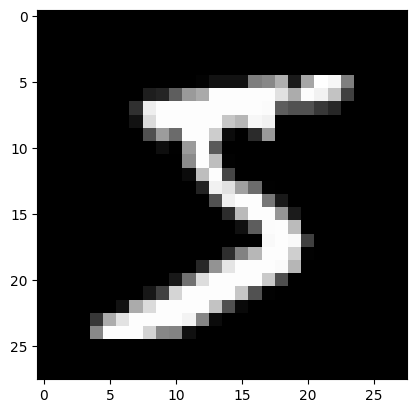

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

In [9]:
image

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

## Modelo

In [10]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

In [11]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.0254,  0.0310,  0.0273,  ...,  0.0014, -0.0083, -0.0079],
                      [ 0.0332, -0.0204, -0.0267,  ...,  0.0277, -0.0196,  0.0123],
                      [-0.0211,  0.0233, -0.0039,  ..., -0.0037,  0.0246, -0.0003],
                      ...,
                      [-0.0296, -0.0151,  0.0295,  ..., -0.0264,  0.0044, -0.0191],
                      [-0.0329, -0.0233,  0.0249,  ...,  0.0182, -0.0060,  0.0034],
                      [-0.0068,  0.0120,  0.0215,  ..., -0.0190, -0.0092,  0.0092]])),
             ('bias',
              tensor([-0.0158,  0.0087, -0.0053,  0.0185, -0.0022,  0.0010,  0.0082, -0.0053,
                      -0.0354, -0.0227]))])

### Testando um predict com poucas amostras

In [12]:
pred = model(Variable(x_train))
pred

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28000x28 and 784x10)

In [13]:
x_train.view(-1,28*28).shape

torch.Size([1000, 784])

In [14]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[-0.1161,  0.0408, -0.0692,  0.0757, -0.0796, -0.2196,  0.0692,  0.0936,
          0.0880, -0.1390],
        [ 0.0006, -0.1179,  0.2154, -0.1580, -0.1240, -0.2732,  0.0136,  0.1461,
          0.1608, -0.1709],
        [ 0.0313, -0.2529,  0.1272, -0.1807, -0.2050,  0.0860,  0.1158, -0.0264,
         -0.1966, -0.1207],
        [-0.1810,  0.0839,  0.0737,  0.2645, -0.1312,  0.0652,  0.1190,  0.2985,
         -0.0245,  0.1905],
        [ 0.1447,  0.1727,  0.0496, -0.2587, -0.0523, -0.3368,  0.1013, -0.1052,
          0.0969, -0.0297]], grad_fn=<AddmmBackward0>)

In [15]:
import torch.nn.functional as F
prob = F.softmax(score, dim=1)
prob*100

tensor([[ 9.0837, 10.6266,  9.5198, 11.0040,  9.4216,  8.1906, 10.9329, 11.2023,
         11.1402,  8.8783],
        [10.1935,  9.0540, 12.6361,  8.6981,  8.9989,  7.7515, 10.3264, 11.7900,
         11.9644,  8.5871],
        [10.8750,  8.1849, 11.9692,  8.7975,  8.5863, 11.4864, 11.8338, 10.2657,
          8.6592,  9.3420],
        [ 7.6519,  9.9720,  9.8708, 11.9457,  8.0426,  9.7874, 10.3289, 12.3593,
          8.9475, 11.0938],
        [11.6625, 11.9938, 10.6043,  7.7914,  9.5771,  7.2057, 11.1668,  9.0839,
         11.1186,  9.7960]], grad_fn=<MulBackward0>)

In [16]:
max_prob, predicts = torch.max(prob, 1)
predicts

tensor([7, 2, 2, 7, 1])

## Treinamento

### Inicialização dos parâmetros

In [17]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [18]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.9 MB/s eta 0:00:00
  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-8v838h2f
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-8v838h2f
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=5036 sha256=9fa6399c05ba820e26d5473f340ebd57e24a7d8bd2e2fc6f79aaa80975c48976
  Stored in directory: /tmp/pip-ephem-wheel-cache-zkx8qakx/wheels/63/59/c1/3342e0bca82db7c512109b8da472d40be5c95cca7ce5363332
Successfully built torchviz


In [19]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3133, grad_fn=<NllLossBackward0>)

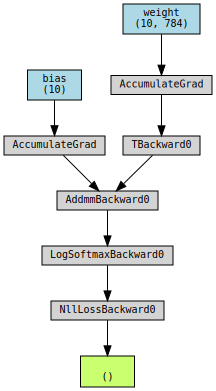

In [20]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

Epoch [1/100], Loss: 2.3133, Accuracy: 0.1120
weights: torch.Size([10, 784])
bias:    torch.Size([10])


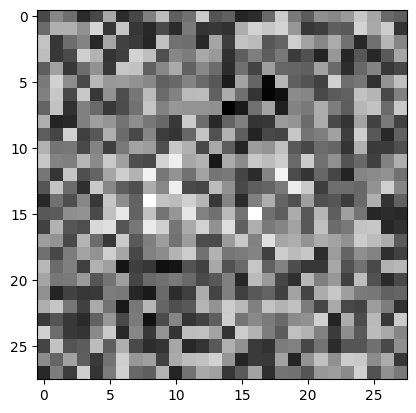

Epoch [2/100], Loss: 1.8067, Accuracy: 0.6750
weights: torch.Size([10, 784])
bias:    torch.Size([10])


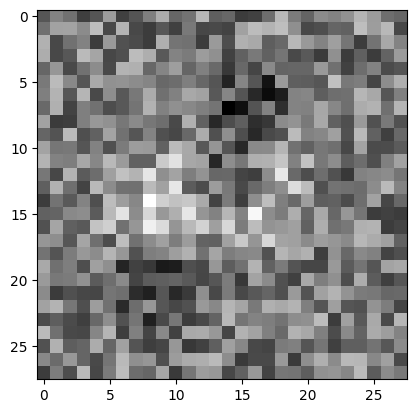

Epoch [3/100], Loss: 1.4709, Accuracy: 0.7430
weights: torch.Size([10, 784])
bias:    torch.Size([10])


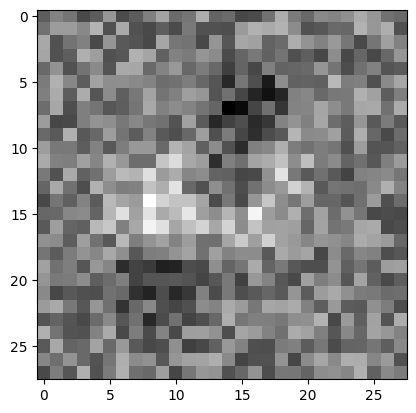

Epoch [4/100], Loss: 1.2505, Accuracy: 0.7690
weights: torch.Size([10, 784])
bias:    torch.Size([10])


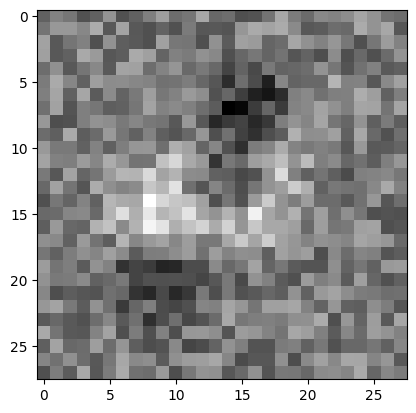

Epoch [5/100], Loss: 1.1008, Accuracy: 0.7920
weights: torch.Size([10, 784])
bias:    torch.Size([10])


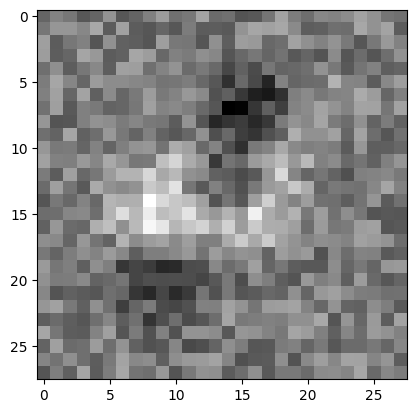

Epoch [6/100], Loss: 0.9927, Accuracy: 0.8050
weights: torch.Size([10, 784])
bias:    torch.Size([10])


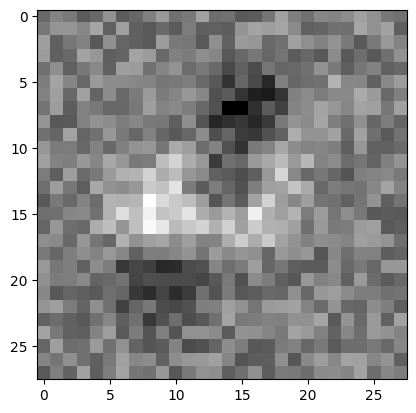

Epoch [7/100], Loss: 0.9121, Accuracy: 0.8230
weights: torch.Size([10, 784])
bias:    torch.Size([10])


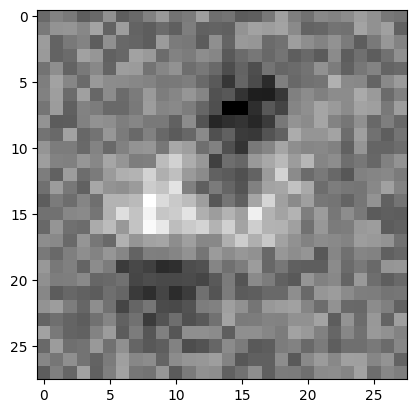

Epoch [8/100], Loss: 0.8496, Accuracy: 0.8270
weights: torch.Size([10, 784])
bias:    torch.Size([10])


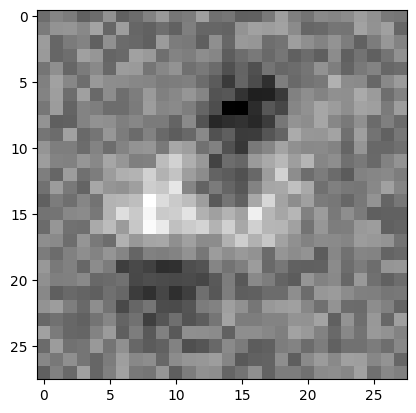

Epoch [9/100], Loss: 0.7994, Accuracy: 0.8360
weights: torch.Size([10, 784])
bias:    torch.Size([10])


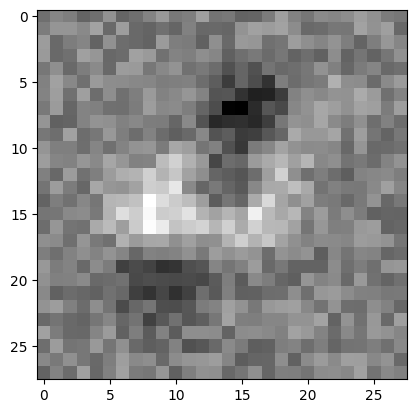

Epoch [10/100], Loss: 0.7580, Accuracy: 0.8380
weights: torch.Size([10, 784])
bias:    torch.Size([10])


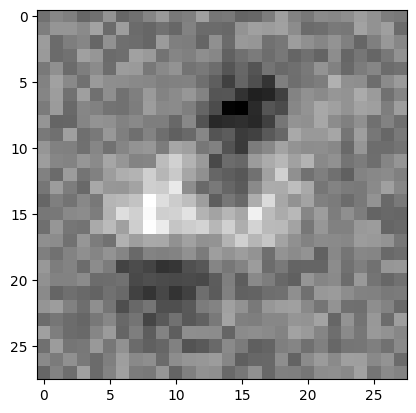

Epoch [11/100], Loss: 0.7231, Accuracy: 0.8460
weights: torch.Size([10, 784])
bias:    torch.Size([10])


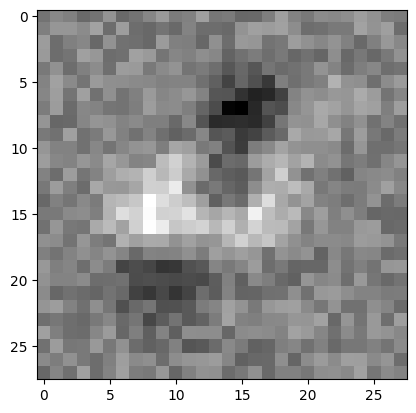

Epoch [12/100], Loss: 0.6932, Accuracy: 0.8540
weights: torch.Size([10, 784])
bias:    torch.Size([10])


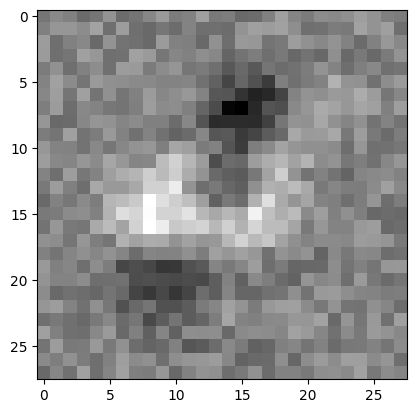

Epoch [13/100], Loss: 0.6672, Accuracy: 0.8570
weights: torch.Size([10, 784])
bias:    torch.Size([10])


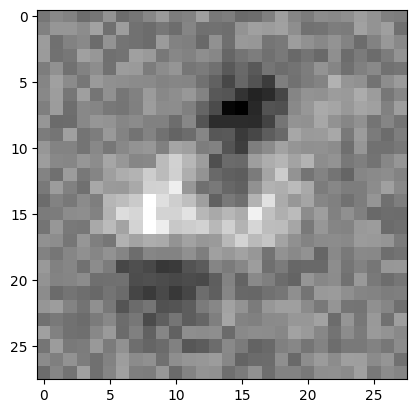

Epoch [14/100], Loss: 0.6443, Accuracy: 0.8620
weights: torch.Size([10, 784])
bias:    torch.Size([10])


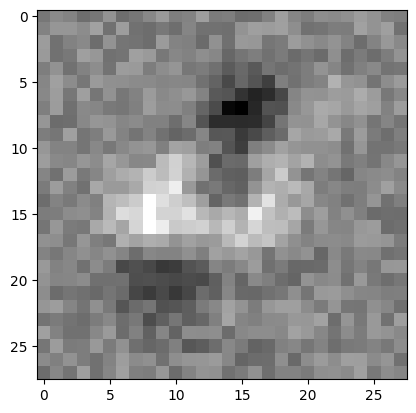

Epoch [15/100], Loss: 0.6239, Accuracy: 0.8640
weights: torch.Size([10, 784])
bias:    torch.Size([10])


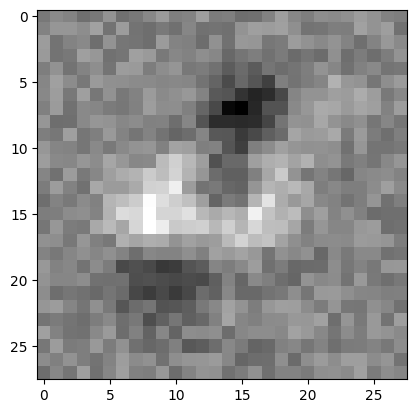

Epoch [16/100], Loss: 0.6057, Accuracy: 0.8690
weights: torch.Size([10, 784])
bias:    torch.Size([10])


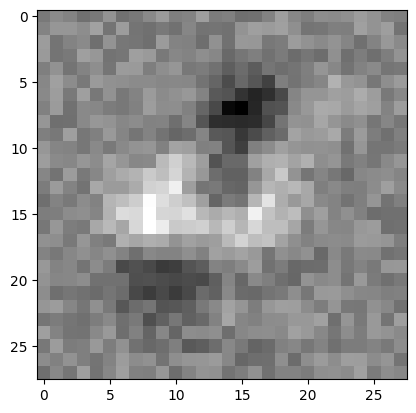

Epoch [17/100], Loss: 0.5891, Accuracy: 0.8730
weights: torch.Size([10, 784])
bias:    torch.Size([10])


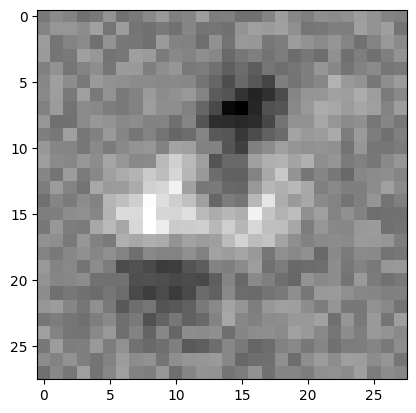

Epoch [18/100], Loss: 0.5741, Accuracy: 0.8760
weights: torch.Size([10, 784])
bias:    torch.Size([10])


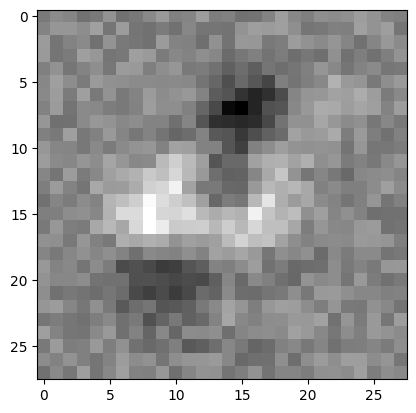

Epoch [19/100], Loss: 0.5603, Accuracy: 0.8760
weights: torch.Size([10, 784])
bias:    torch.Size([10])


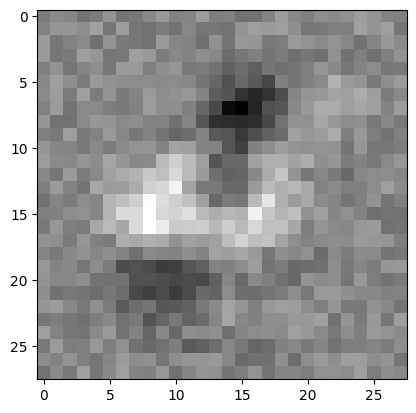

Epoch [20/100], Loss: 0.5476, Accuracy: 0.8770
weights: torch.Size([10, 784])
bias:    torch.Size([10])


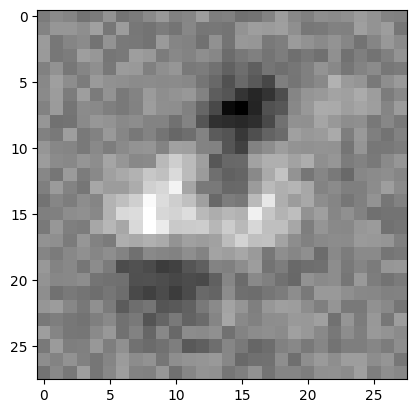

Epoch [21/100], Loss: 0.5359, Accuracy: 0.8850
weights: torch.Size([10, 784])
bias:    torch.Size([10])


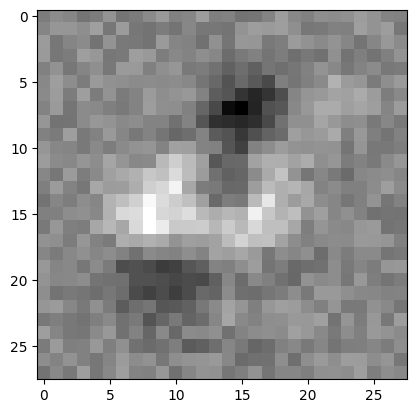

Epoch [22/100], Loss: 0.5250, Accuracy: 0.8890
weights: torch.Size([10, 784])
bias:    torch.Size([10])


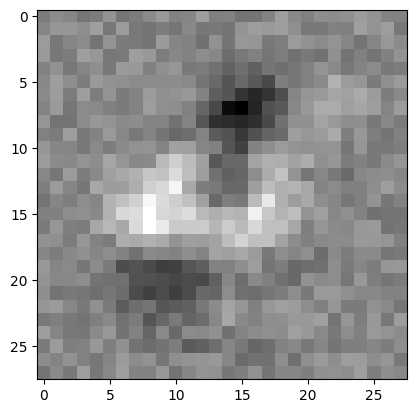

Epoch [23/100], Loss: 0.5148, Accuracy: 0.8890
weights: torch.Size([10, 784])
bias:    torch.Size([10])


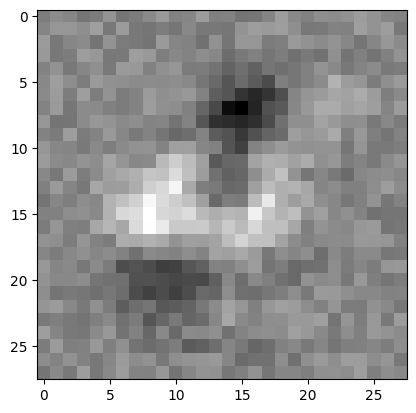

Epoch [24/100], Loss: 0.5053, Accuracy: 0.8920
weights: torch.Size([10, 784])
bias:    torch.Size([10])


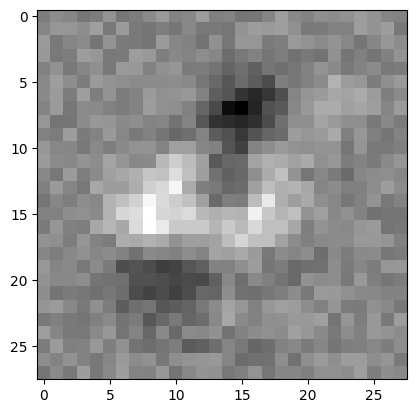

Epoch [25/100], Loss: 0.4964, Accuracy: 0.8920
weights: torch.Size([10, 784])
bias:    torch.Size([10])


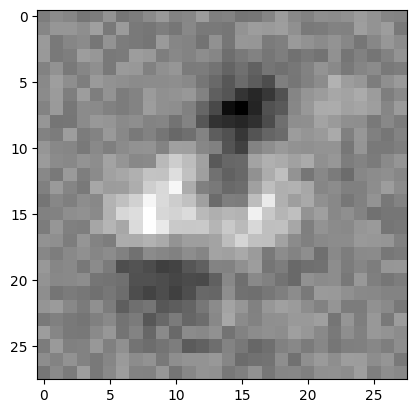

Epoch [26/100], Loss: 0.4880, Accuracy: 0.8930
weights: torch.Size([10, 784])
bias:    torch.Size([10])


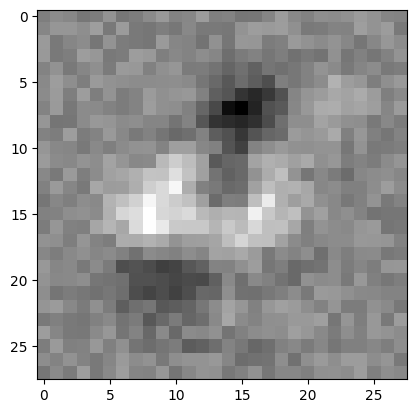

Epoch [27/100], Loss: 0.4800, Accuracy: 0.8930
weights: torch.Size([10, 784])
bias:    torch.Size([10])


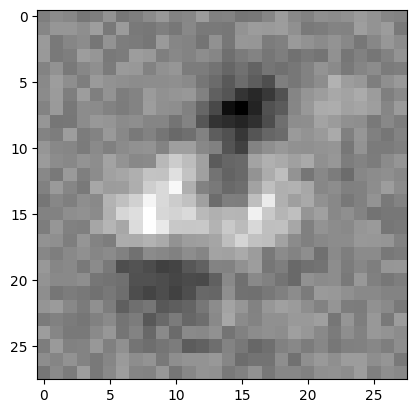

Epoch [28/100], Loss: 0.4725, Accuracy: 0.8950
weights: torch.Size([10, 784])
bias:    torch.Size([10])


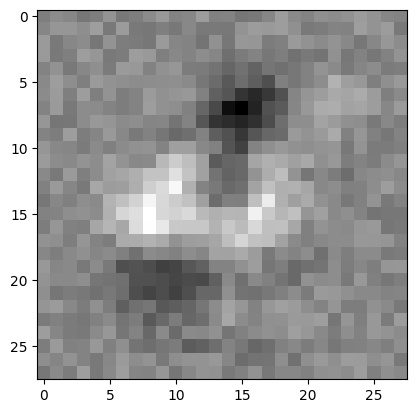

Epoch [29/100], Loss: 0.4654, Accuracy: 0.8970
weights: torch.Size([10, 784])
bias:    torch.Size([10])


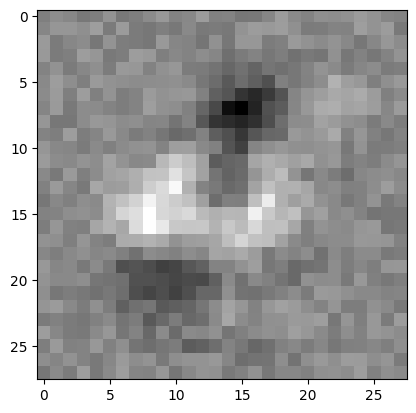

Epoch [30/100], Loss: 0.4586, Accuracy: 0.8990
weights: torch.Size([10, 784])
bias:    torch.Size([10])


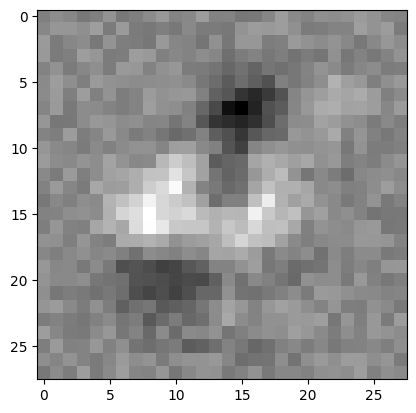

Epoch [31/100], Loss: 0.4521, Accuracy: 0.9000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


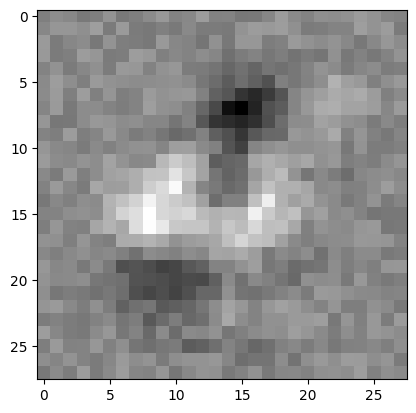

Epoch [32/100], Loss: 0.4460, Accuracy: 0.9040
weights: torch.Size([10, 784])
bias:    torch.Size([10])


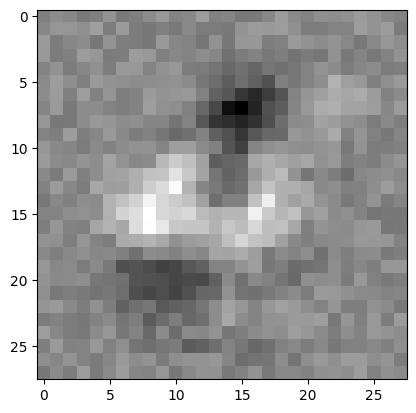

Epoch [33/100], Loss: 0.4401, Accuracy: 0.9040
weights: torch.Size([10, 784])
bias:    torch.Size([10])


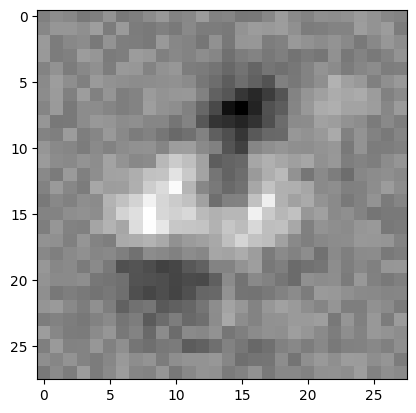

Epoch [34/100], Loss: 0.4345, Accuracy: 0.9030
weights: torch.Size([10, 784])
bias:    torch.Size([10])


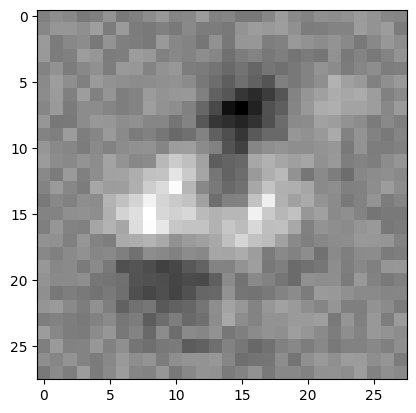

Epoch [35/100], Loss: 0.4291, Accuracy: 0.9050
weights: torch.Size([10, 784])
bias:    torch.Size([10])


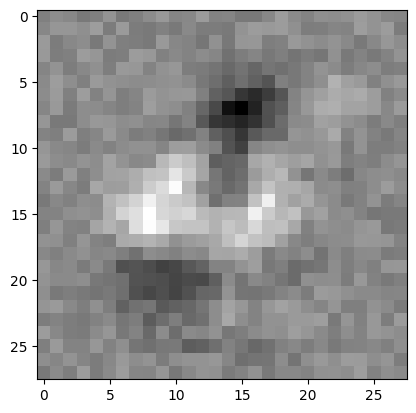

Epoch [36/100], Loss: 0.4239, Accuracy: 0.9050
weights: torch.Size([10, 784])
bias:    torch.Size([10])


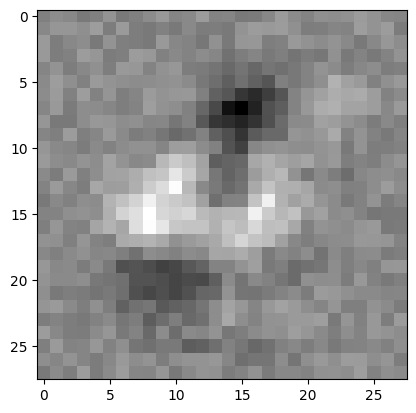

Epoch [37/100], Loss: 0.4189, Accuracy: 0.9050
weights: torch.Size([10, 784])
bias:    torch.Size([10])


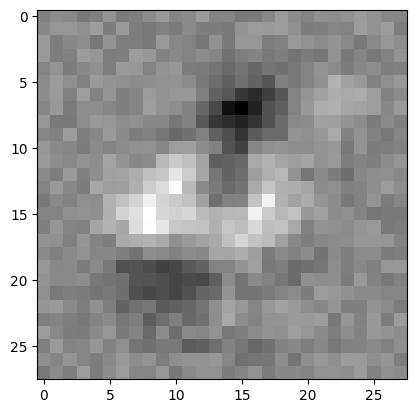

Epoch [38/100], Loss: 0.4141, Accuracy: 0.9050
weights: torch.Size([10, 784])
bias:    torch.Size([10])


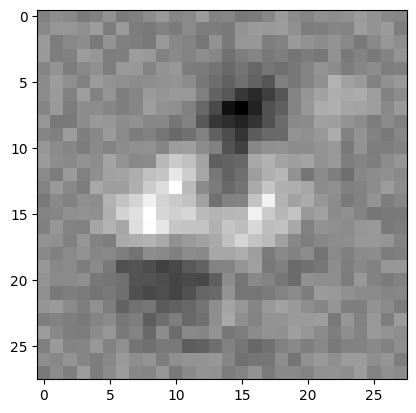

Epoch [39/100], Loss: 0.4094, Accuracy: 0.9060
weights: torch.Size([10, 784])
bias:    torch.Size([10])


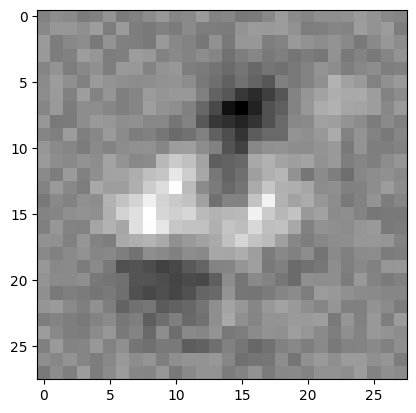

Epoch [40/100], Loss: 0.4050, Accuracy: 0.9060
weights: torch.Size([10, 784])
bias:    torch.Size([10])


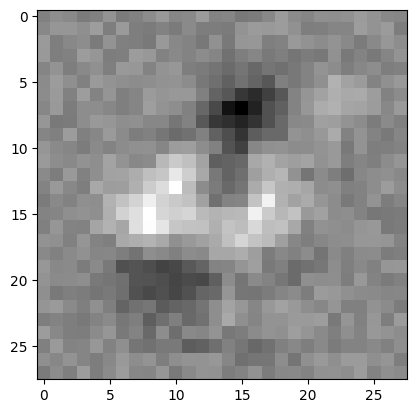

Epoch [41/100], Loss: 0.4007, Accuracy: 0.9070
weights: torch.Size([10, 784])
bias:    torch.Size([10])


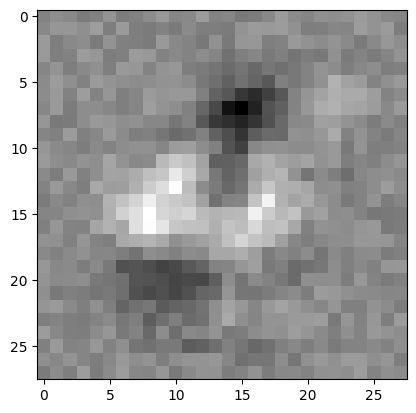

Epoch [42/100], Loss: 0.3965, Accuracy: 0.9090
weights: torch.Size([10, 784])
bias:    torch.Size([10])


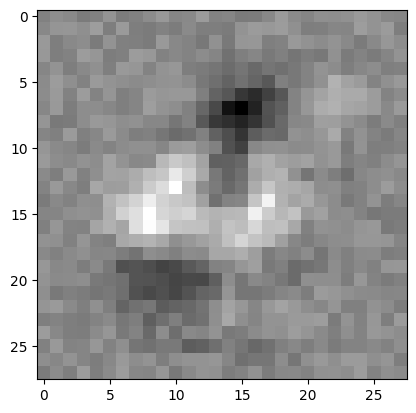

Epoch [43/100], Loss: 0.3925, Accuracy: 0.9100
weights: torch.Size([10, 784])
bias:    torch.Size([10])


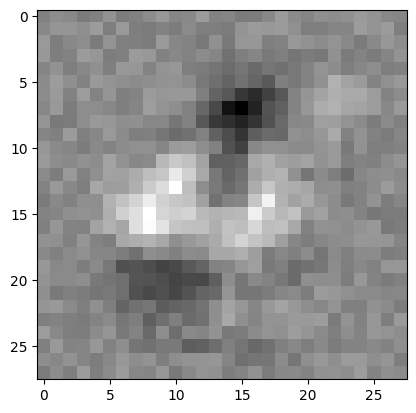

Epoch [44/100], Loss: 0.3886, Accuracy: 0.9110
weights: torch.Size([10, 784])
bias:    torch.Size([10])


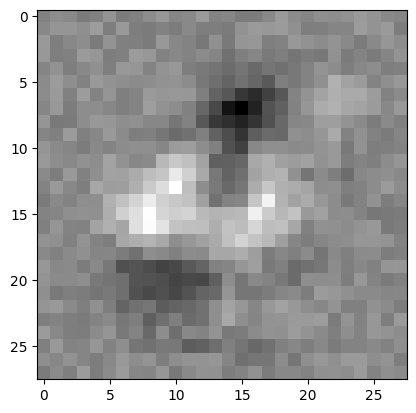

Epoch [45/100], Loss: 0.3848, Accuracy: 0.9120
weights: torch.Size([10, 784])
bias:    torch.Size([10])


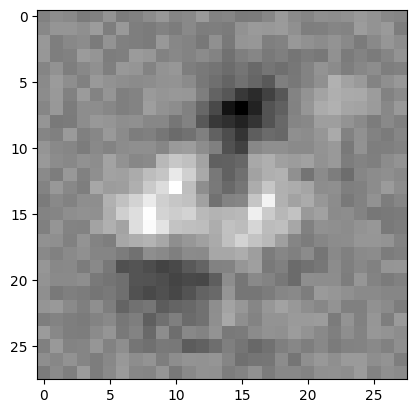

Epoch [46/100], Loss: 0.3811, Accuracy: 0.9150
weights: torch.Size([10, 784])
bias:    torch.Size([10])


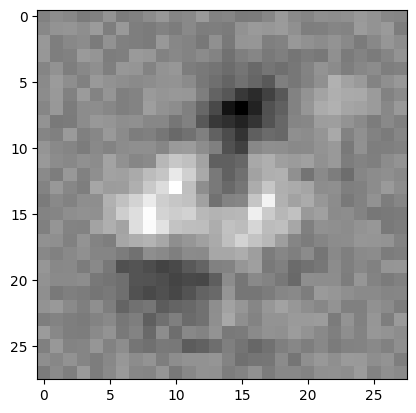

Epoch [47/100], Loss: 0.3775, Accuracy: 0.9150
weights: torch.Size([10, 784])
bias:    torch.Size([10])


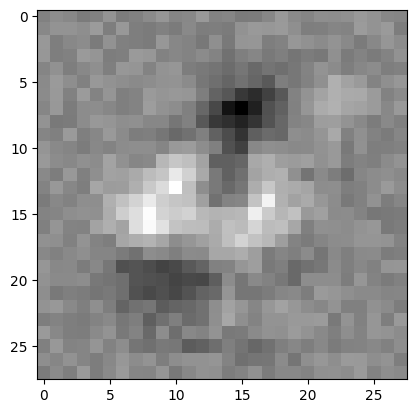

Epoch [48/100], Loss: 0.3741, Accuracy: 0.9150
weights: torch.Size([10, 784])
bias:    torch.Size([10])


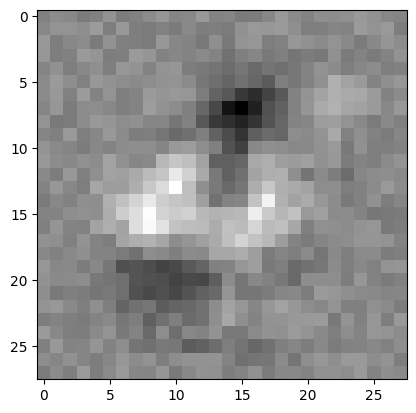

Epoch [49/100], Loss: 0.3707, Accuracy: 0.9170
weights: torch.Size([10, 784])
bias:    torch.Size([10])


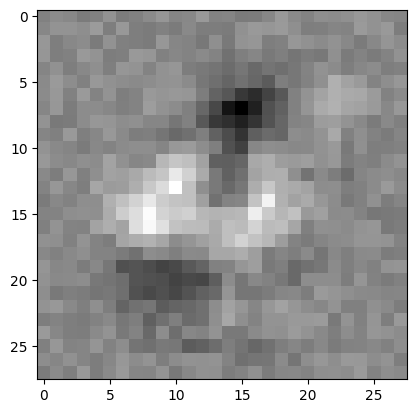

Epoch [50/100], Loss: 0.3674, Accuracy: 0.9180
weights: torch.Size([10, 784])
bias:    torch.Size([10])


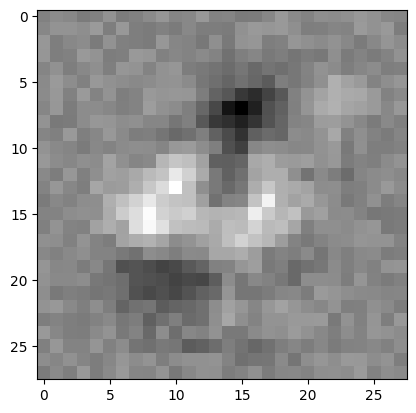

Epoch [51/100], Loss: 0.3642, Accuracy: 0.9190
weights: torch.Size([10, 784])
bias:    torch.Size([10])


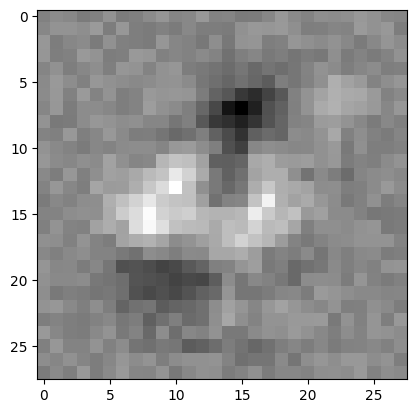

Epoch [52/100], Loss: 0.3611, Accuracy: 0.9200
weights: torch.Size([10, 784])
bias:    torch.Size([10])


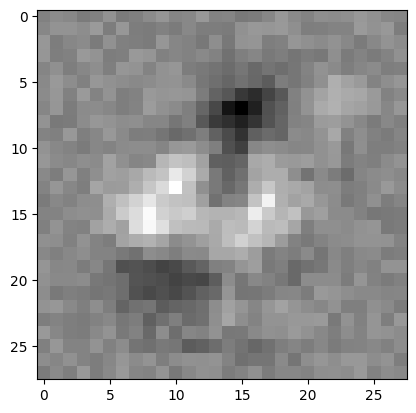

Epoch [53/100], Loss: 0.3581, Accuracy: 0.9220
weights: torch.Size([10, 784])
bias:    torch.Size([10])


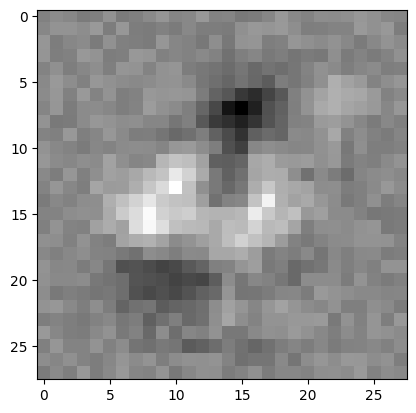

Epoch [54/100], Loss: 0.3551, Accuracy: 0.9220
weights: torch.Size([10, 784])
bias:    torch.Size([10])


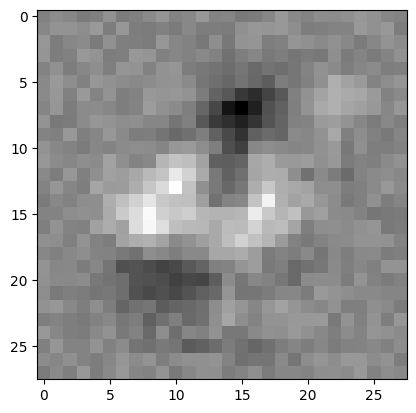

Epoch [55/100], Loss: 0.3522, Accuracy: 0.9230
weights: torch.Size([10, 784])
bias:    torch.Size([10])


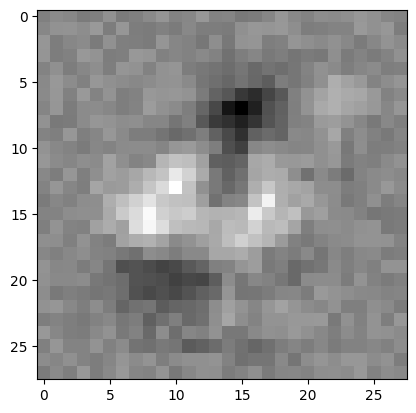

Epoch [56/100], Loss: 0.3494, Accuracy: 0.9230
weights: torch.Size([10, 784])
bias:    torch.Size([10])


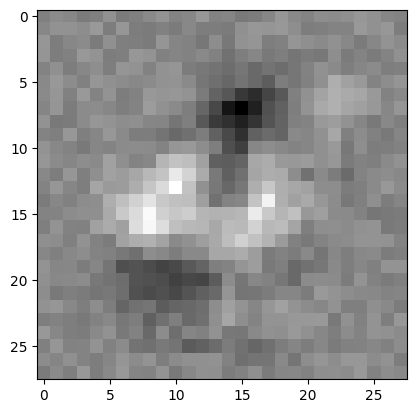

Epoch [57/100], Loss: 0.3467, Accuracy: 0.9240
weights: torch.Size([10, 784])
bias:    torch.Size([10])


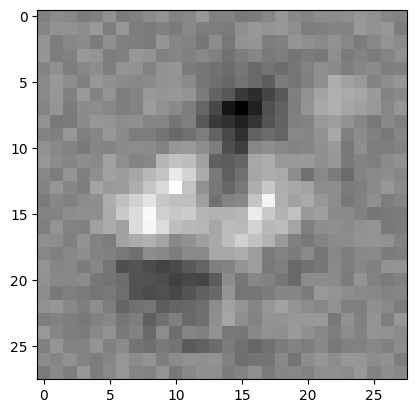

Epoch [58/100], Loss: 0.3440, Accuracy: 0.9240
weights: torch.Size([10, 784])
bias:    torch.Size([10])


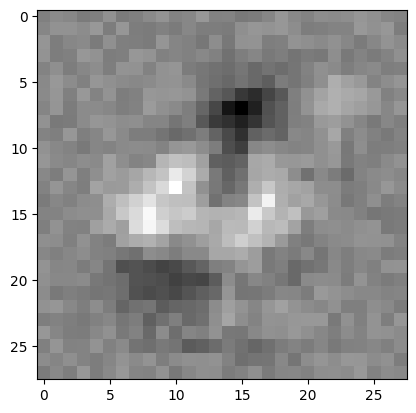

Epoch [59/100], Loss: 0.3413, Accuracy: 0.9240
weights: torch.Size([10, 784])
bias:    torch.Size([10])


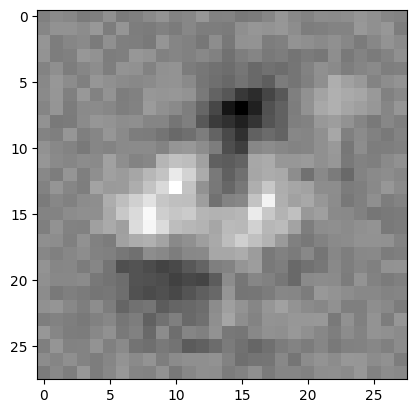

Epoch [60/100], Loss: 0.3388, Accuracy: 0.9240
weights: torch.Size([10, 784])
bias:    torch.Size([10])


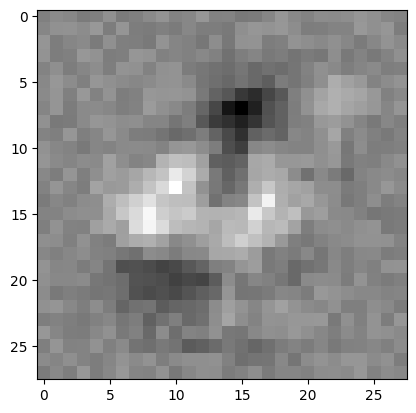

Epoch [61/100], Loss: 0.3362, Accuracy: 0.9250
weights: torch.Size([10, 784])
bias:    torch.Size([10])


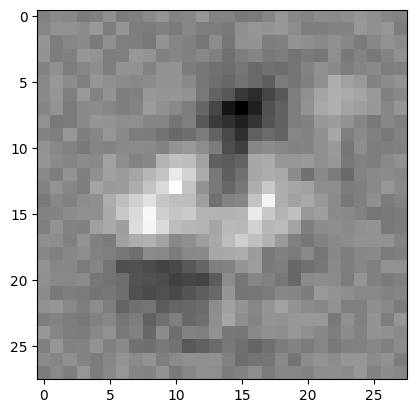

Epoch [62/100], Loss: 0.3338, Accuracy: 0.9250
weights: torch.Size([10, 784])
bias:    torch.Size([10])


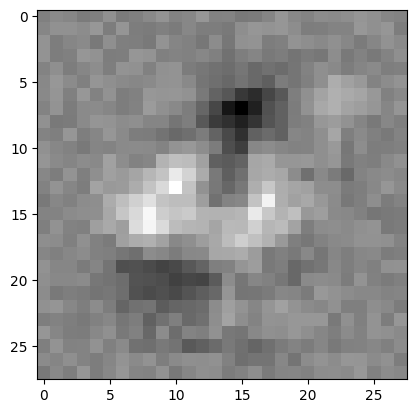

Epoch [63/100], Loss: 0.3314, Accuracy: 0.9240
weights: torch.Size([10, 784])
bias:    torch.Size([10])


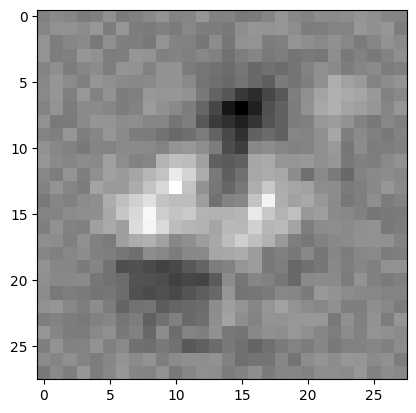

Epoch [64/100], Loss: 0.3290, Accuracy: 0.9240
weights: torch.Size([10, 784])
bias:    torch.Size([10])


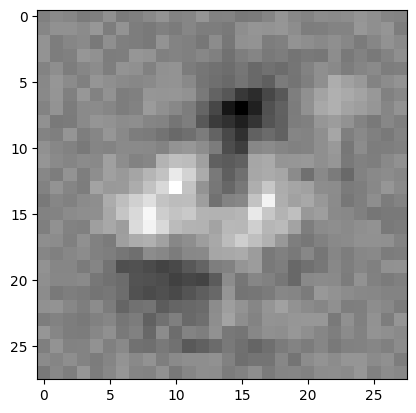

Epoch [65/100], Loss: 0.3267, Accuracy: 0.9240
weights: torch.Size([10, 784])
bias:    torch.Size([10])


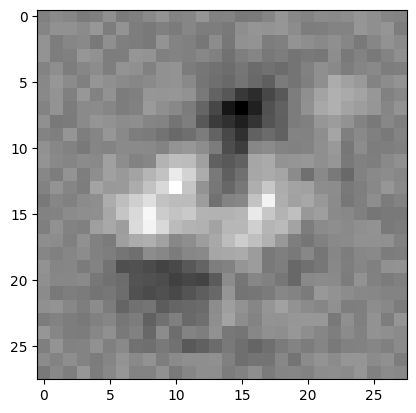

Epoch [66/100], Loss: 0.3244, Accuracy: 0.9240
weights: torch.Size([10, 784])
bias:    torch.Size([10])


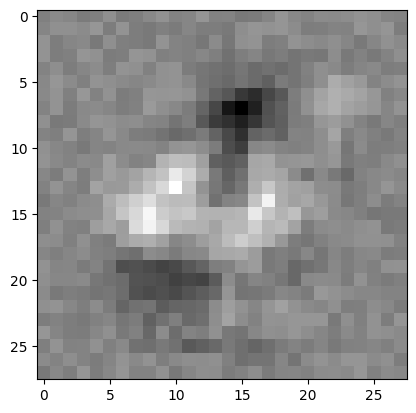

Epoch [67/100], Loss: 0.3222, Accuracy: 0.9240
weights: torch.Size([10, 784])
bias:    torch.Size([10])


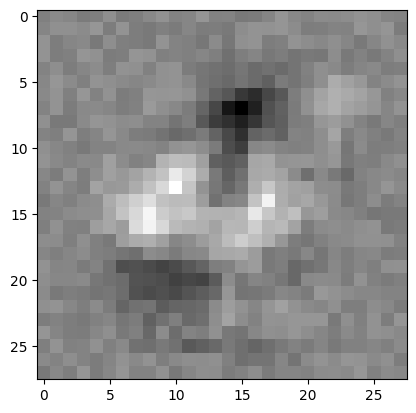

Epoch [68/100], Loss: 0.3200, Accuracy: 0.9280
weights: torch.Size([10, 784])
bias:    torch.Size([10])


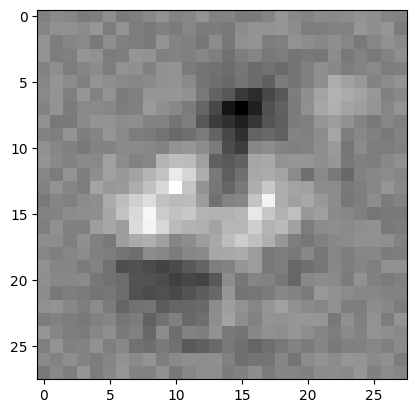

Epoch [69/100], Loss: 0.3178, Accuracy: 0.9280
weights: torch.Size([10, 784])
bias:    torch.Size([10])


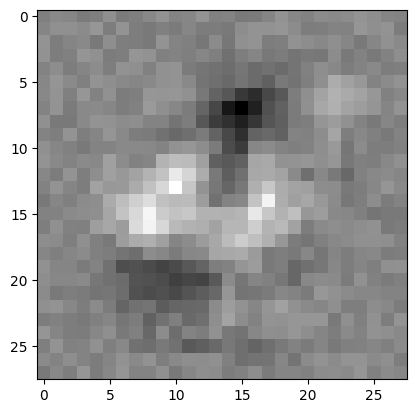

Epoch [70/100], Loss: 0.3157, Accuracy: 0.9280
weights: torch.Size([10, 784])
bias:    torch.Size([10])


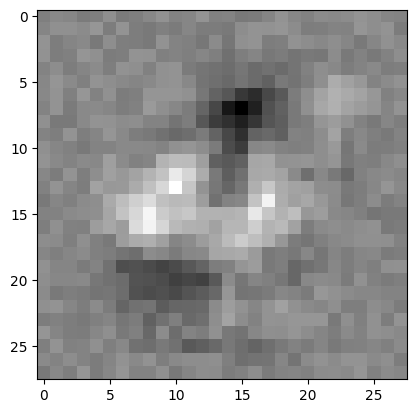

Epoch [71/100], Loss: 0.3137, Accuracy: 0.9280
weights: torch.Size([10, 784])
bias:    torch.Size([10])


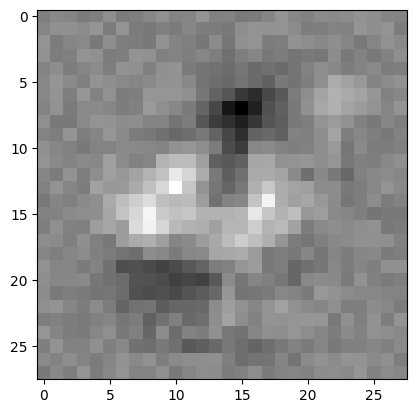

Epoch [72/100], Loss: 0.3116, Accuracy: 0.9280
weights: torch.Size([10, 784])
bias:    torch.Size([10])


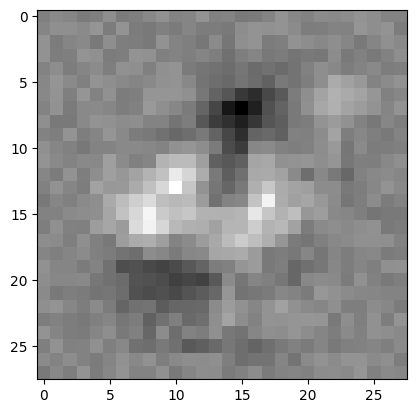

Epoch [73/100], Loss: 0.3096, Accuracy: 0.9280
weights: torch.Size([10, 784])
bias:    torch.Size([10])


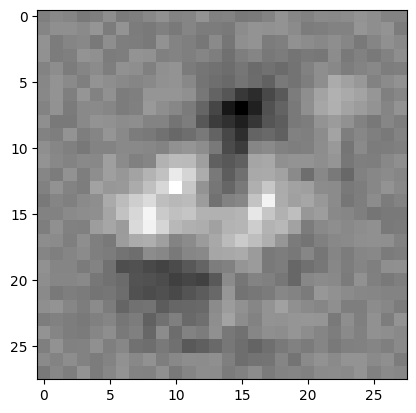

Epoch [74/100], Loss: 0.3077, Accuracy: 0.9280
weights: torch.Size([10, 784])
bias:    torch.Size([10])


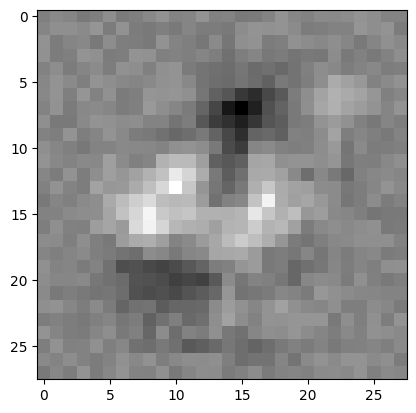

Epoch [75/100], Loss: 0.3057, Accuracy: 0.9280
weights: torch.Size([10, 784])
bias:    torch.Size([10])


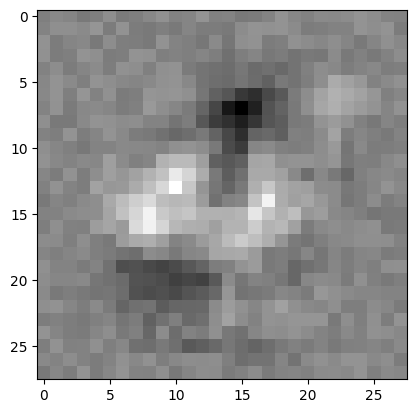

Epoch [76/100], Loss: 0.3038, Accuracy: 0.9280
weights: torch.Size([10, 784])
bias:    torch.Size([10])


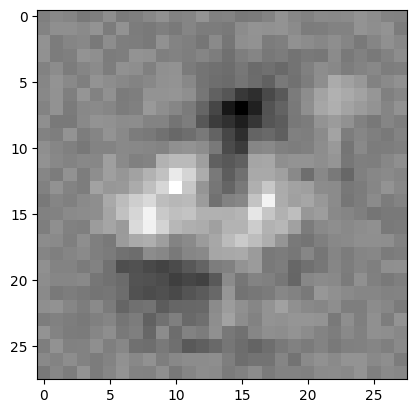

Epoch [77/100], Loss: 0.3019, Accuracy: 0.9290
weights: torch.Size([10, 784])
bias:    torch.Size([10])


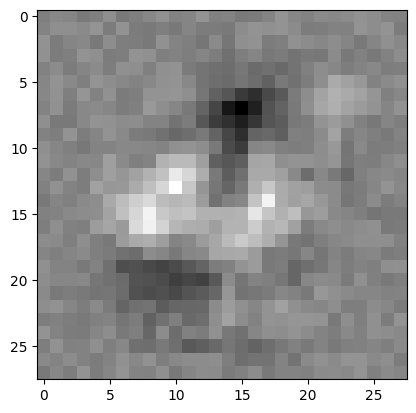

Epoch [78/100], Loss: 0.3001, Accuracy: 0.9300
weights: torch.Size([10, 784])
bias:    torch.Size([10])


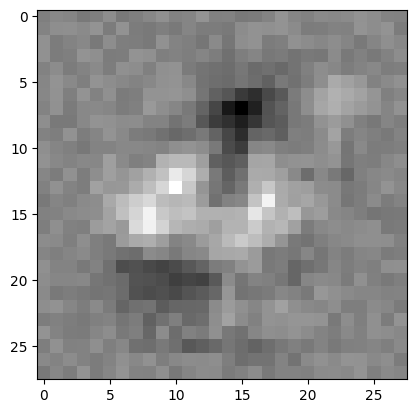

Epoch [79/100], Loss: 0.2983, Accuracy: 0.9310
weights: torch.Size([10, 784])
bias:    torch.Size([10])


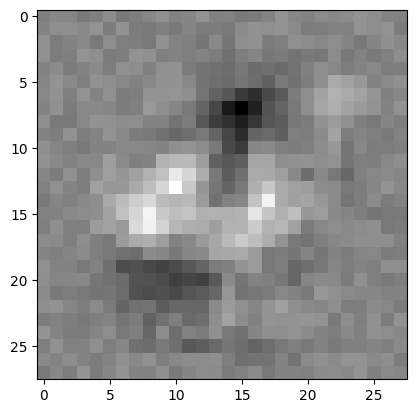

Epoch [80/100], Loss: 0.2965, Accuracy: 0.9320
weights: torch.Size([10, 784])
bias:    torch.Size([10])


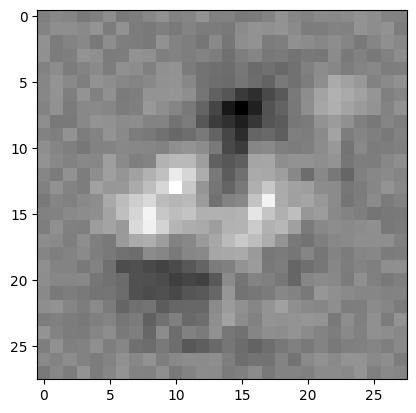

Epoch [81/100], Loss: 0.2948, Accuracy: 0.9320
weights: torch.Size([10, 784])
bias:    torch.Size([10])


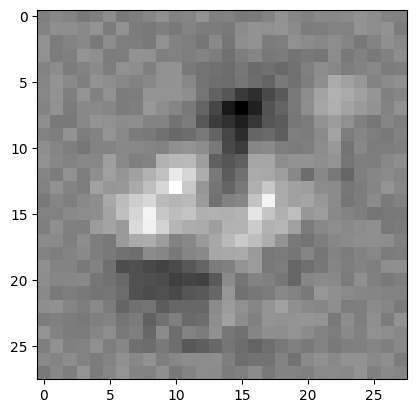

Epoch [82/100], Loss: 0.2930, Accuracy: 0.9330
weights: torch.Size([10, 784])
bias:    torch.Size([10])


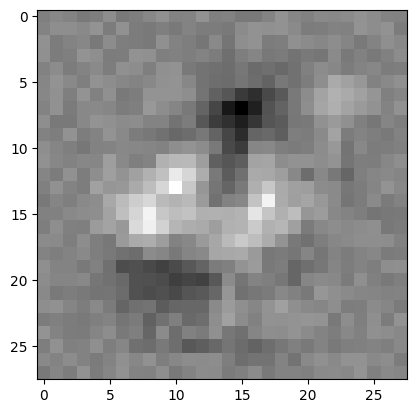

Epoch [83/100], Loss: 0.2913, Accuracy: 0.9350
weights: torch.Size([10, 784])
bias:    torch.Size([10])


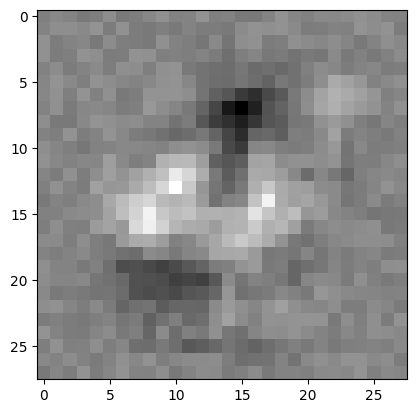

Epoch [84/100], Loss: 0.2896, Accuracy: 0.9370
weights: torch.Size([10, 784])
bias:    torch.Size([10])


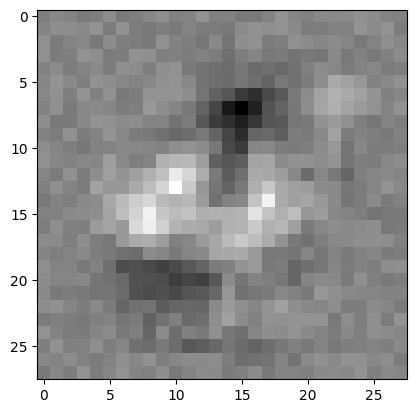

Epoch [85/100], Loss: 0.2880, Accuracy: 0.9370
weights: torch.Size([10, 784])
bias:    torch.Size([10])


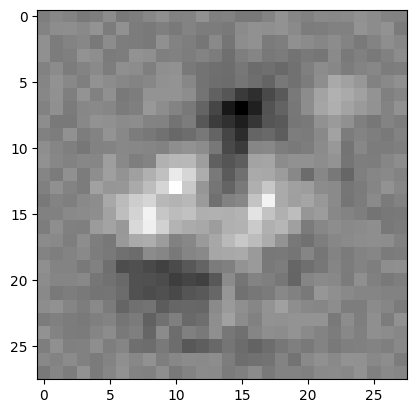

Epoch [86/100], Loss: 0.2864, Accuracy: 0.9370
weights: torch.Size([10, 784])
bias:    torch.Size([10])


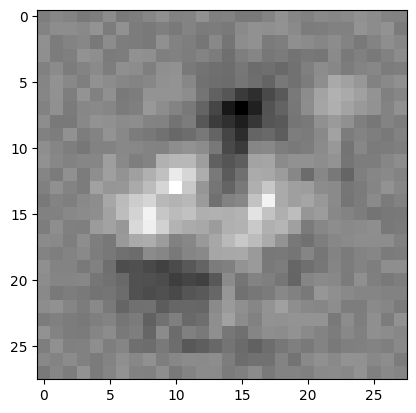

Epoch [87/100], Loss: 0.2848, Accuracy: 0.9370
weights: torch.Size([10, 784])
bias:    torch.Size([10])


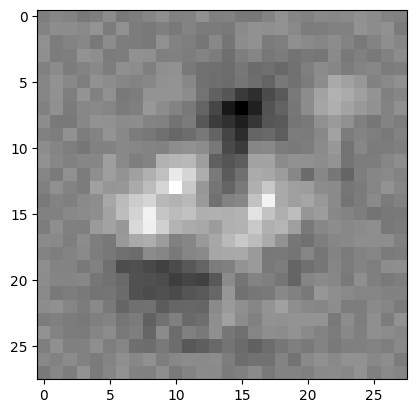

Epoch [88/100], Loss: 0.2832, Accuracy: 0.9370
weights: torch.Size([10, 784])
bias:    torch.Size([10])


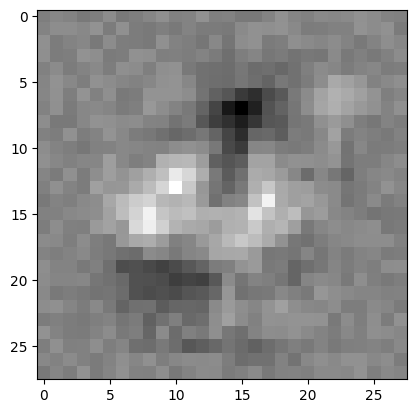

Epoch [89/100], Loss: 0.2816, Accuracy: 0.9390
weights: torch.Size([10, 784])
bias:    torch.Size([10])


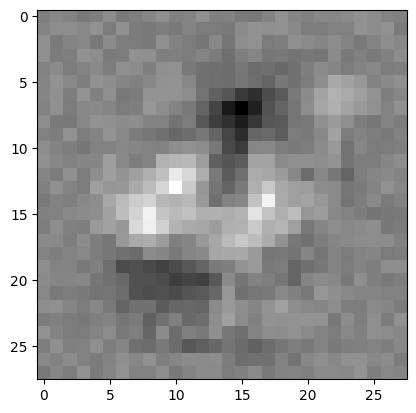

Epoch [90/100], Loss: 0.2801, Accuracy: 0.9410
weights: torch.Size([10, 784])
bias:    torch.Size([10])


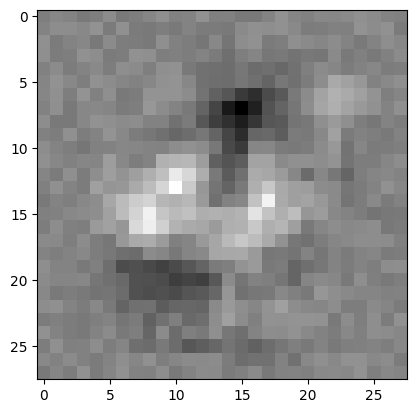

Epoch [91/100], Loss: 0.2785, Accuracy: 0.9410
weights: torch.Size([10, 784])
bias:    torch.Size([10])


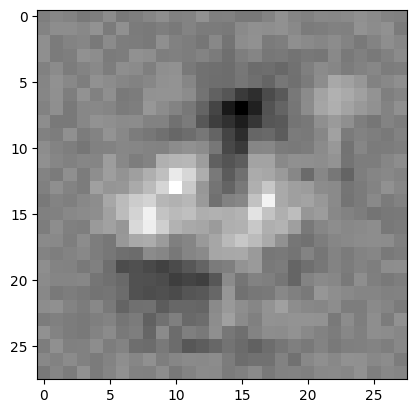

Epoch [92/100], Loss: 0.2770, Accuracy: 0.9410
weights: torch.Size([10, 784])
bias:    torch.Size([10])


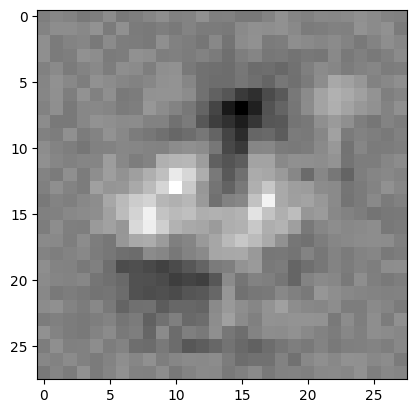

Epoch [93/100], Loss: 0.2756, Accuracy: 0.9410
weights: torch.Size([10, 784])
bias:    torch.Size([10])


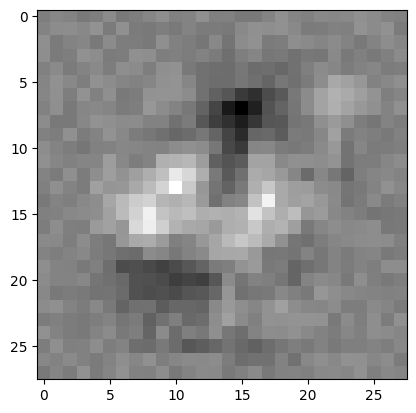

Epoch [94/100], Loss: 0.2741, Accuracy: 0.9410
weights: torch.Size([10, 784])
bias:    torch.Size([10])


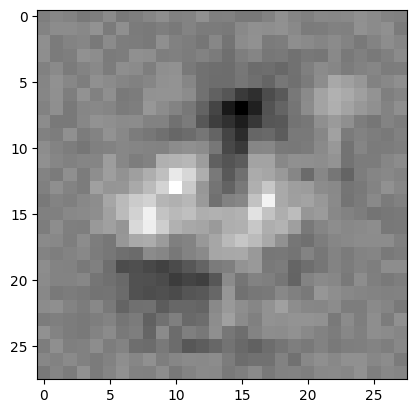

Epoch [95/100], Loss: 0.2727, Accuracy: 0.9410
weights: torch.Size([10, 784])
bias:    torch.Size([10])


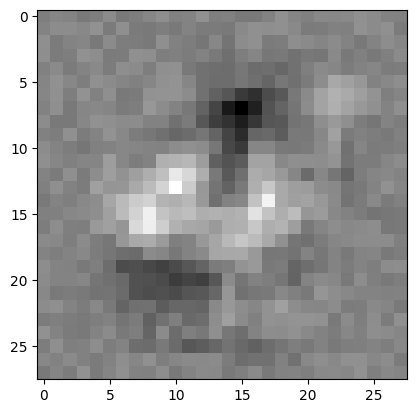

Epoch [96/100], Loss: 0.2712, Accuracy: 0.9420
weights: torch.Size([10, 784])
bias:    torch.Size([10])


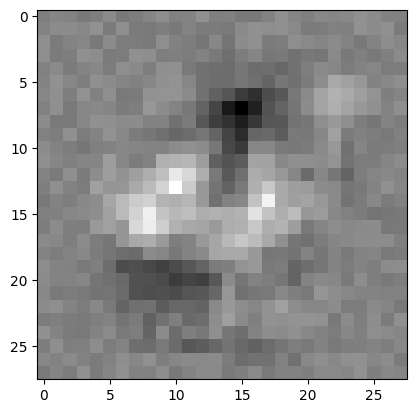

Epoch [97/100], Loss: 0.2698, Accuracy: 0.9420
weights: torch.Size([10, 784])
bias:    torch.Size([10])


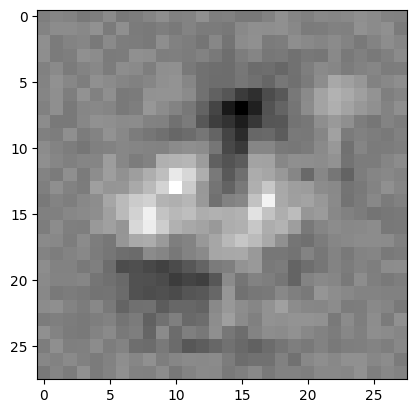

Epoch [98/100], Loss: 0.2684, Accuracy: 0.9420
weights: torch.Size([10, 784])
bias:    torch.Size([10])


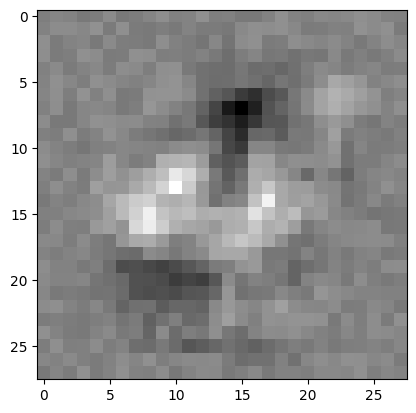

Epoch [99/100], Loss: 0.2671, Accuracy: 0.9420
weights: torch.Size([10, 784])
bias:    torch.Size([10])


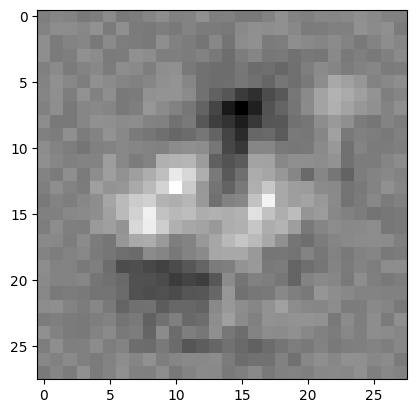

Epoch [100/100], Loss: 0.2657, Accuracy: 0.9430
weights: torch.Size([10, 784])
bias:    torch.Size([10])


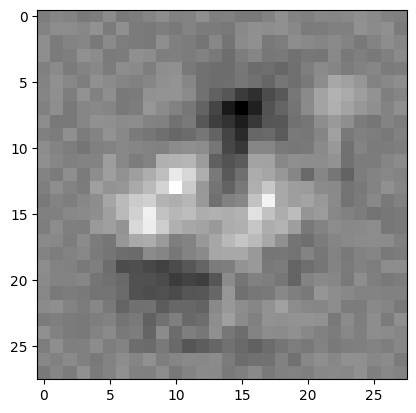

In [21]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    print(f"Epoch [{i+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()

In [22]:
print('Final loss:', loss.item())

Final loss: 0.26571276783943176


### Visualizando gráfico de perda durante o treinamento

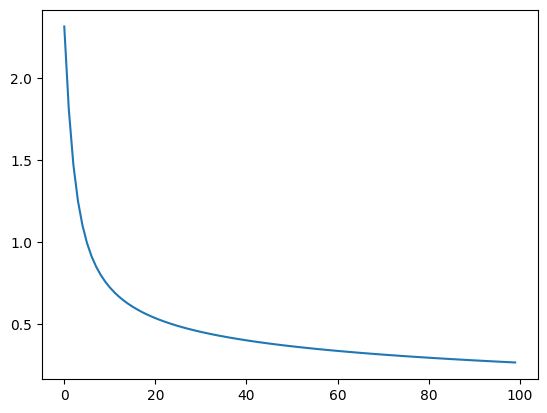

In [23]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [24]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.943


### Matriz de confusão com dados de treinamento e teste

In [25]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,2,3,1,0
2,0,1,91,1,0,1,0,1,1,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,1,1,2,0,3
5,0,2,0,1,0,83,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,110,0,3
8,0,2,2,0,0,1,0,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


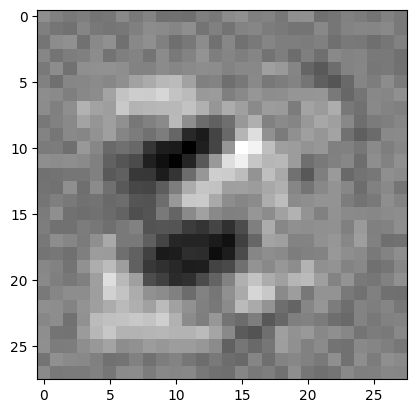

In [26]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

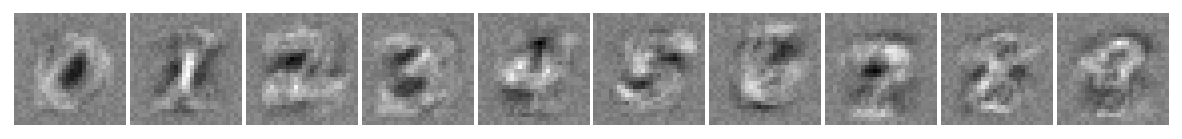

In [27]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

R.: Está implementado na parte do código de laço de treinamento

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede? R.: O shape de entranda (60000, 784)
2. Qual é o shape da saída da rede? R.: O shape de saída (60000, 10)
3. Qual é o número total de parâmetros da rede, incluindo o bias? R.: 7.850

# Aprendizados
